In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
train=pd.read_csv("/content/BlackFridaySalesPrediction.csv")

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


User_ID: Unique identifier of shopper.

Product_ID: Unique identifier of product. (No key given)

Gender: Sex of shopper.

Age: Age of shopper split into bins.

Occupation: Occupation of shopper. (No key given)

City_Category: Residence location of shopper. (No key given)

Stay_In_Current_City_Years: Number of years stay in current city.

Marital_Status: Marital status of shopper.

Product_Category_1: Product category of purchase.

Product_Category_2: Product may belong to other category.

Product_Category_3: Product may belong to other category.

Purchase: Purchase amount in dollars.

In [ ]:
train.shape

(550068, 12)

In [ ]:
m=train['Gender'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
age=train['Age'].value_counts()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(age,y=age,x=age.index,color=age.index,template='ggplot2')
fig.update_layout(
    xaxis_title= 'Age',
    yaxis_title="Count",
    legend_title='Age',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

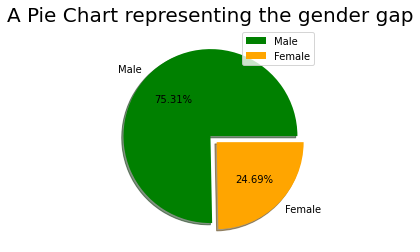

In [ ]:
labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]

plt.pie(m, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['Gender']).mean()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,5.717714,10.009166,12.453556
M,5.301512,9.788729,12.730699


In [ ]:
train[['Product_Category_1','Product_Category_2','Product_Category_3']].groupby(train['User_ID']).count()

,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,,,
1000001,35,21,14
1000002,77,54,26
1000003,29,23,13
1000004,14,12,9
1000005,106,58,16
...,...,...,...
1006036,514,319,110
1006037,122,74,33
1006038,12,9,3


In [ ]:
train.groupby('User_ID').Product_ID.count()

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: Product_ID, Length: 5891, dtype: int64

In [ ]:
train['Product_ID'].value_counts()[:5]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


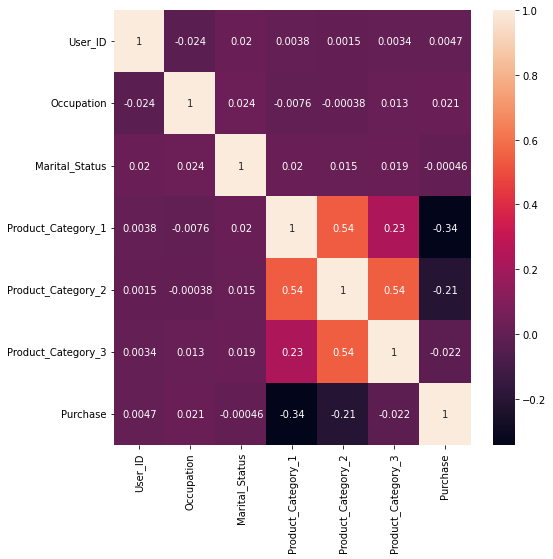

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [ ]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


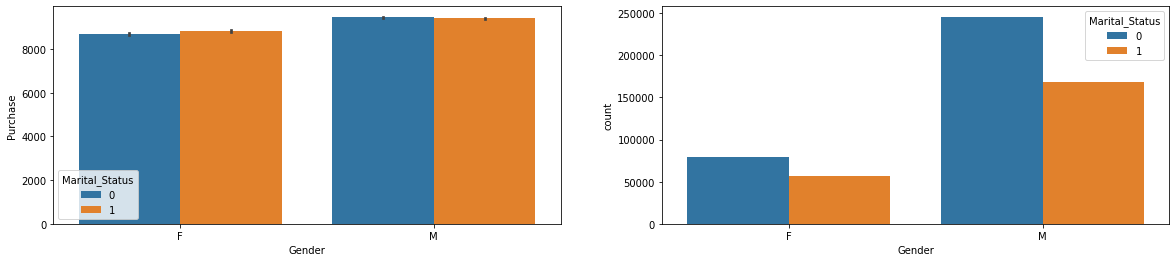

In [ ]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=train,ax=ax[1])

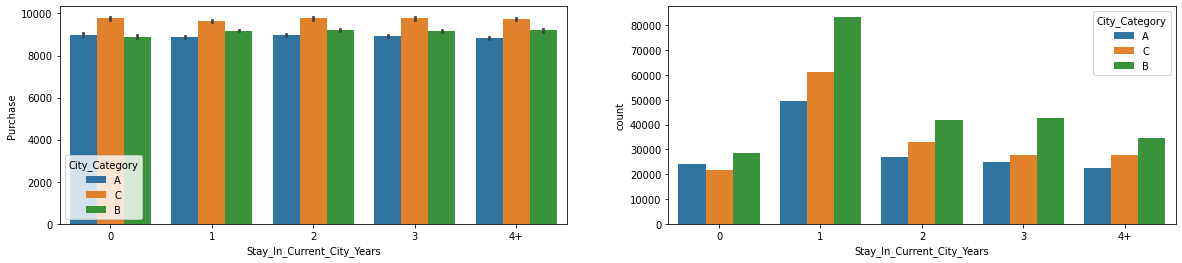

In [ ]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=train,ax=ax[1])

In [ ]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)

In [ ]:
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0],inplace=True)

In [ ]:
train['Product_Category_1']=np.sqrt(train['Product_Category_1'])

In [ ]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,1.732051,9.842329,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.000000,6.000000,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,3.464102,9.842329,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,3.464102,14.000000,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,2.828427,9.842329,16.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1.000000,2.000000,16.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1.000000,8.000000,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1.000000,15.000000,16.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1.000000,16.000000,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,2.828427,9.842329,16.0,7871


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
train['Product_ID']=le.fit_transform(train['Product_ID'])

In [ ]:
columns=[]
for col in train.columns:
    if train[col].dtypes=='object':
        columns.append(col)

In [ ]:
train_encode=pd.get_dummies(train,columns=columns,dtype=np.uint8) # categorical to dummy ya indicator variable

In [ ]:
train_encode.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,10,0,1.732051,9.842329,16.0,8370,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,2376,10,0,1.000000,6.000000,14.0,15200,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,852,10,0,3.464102,9.842329,16.0,1422,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,828,10,0,3.464102,14.000000,16.0,1057,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,2734,16,0,2.828427,9.842329,16.0,7969,0,1,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
train_encode=train_encode.drop(train_encode.index[203281])

In [ ]:
y=train_encode['Purchase']

In [ ]:
X=train_encode.drop(['Purchase'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=192529)

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [ ]:
np.isfinite(X)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
np.argwhere(np.isnan(X))

array([], shape=(0, 2), dtype=int64)

In [ ]:
model.fit(X,y)


LinearRegression()

In [ ]:
yPred = model.predict(X)

In [ ]:
print("Accuracy on Traing set: ",model.score(X,yPred))

Accuracy on Traing set:  1.0
